# Sanity
Okay this is mostly to help me keep my sanity.  I'm grabbing what I think is the most important parts of the helix notebook and trying to get a clean environment to build out what I need for this week.

## Imports and functions.

In [1]:
import numpy as np
from AutoEncoders import GRAEAnchor
import pandas as pd
from data_creation import generate_line_and_helix, generate_line_and_helix_with_noise
from helpers import *
from mashspud import MASH, SPUD
from cluster_help import *

def mod_anchors(anchors, removal):
    sort_anchors=np.sort(anchors)
    sort_remove=list(removal)
    for x in range(len(sort_anchors)):
        for y in range(len(sort_remove)):
            if sort_anchors[x]>=sort_remove[y]:
                sort_anchors[x]=sort_anchors[x]-1
    return(np.sort(sort_anchors))

## Work place

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0


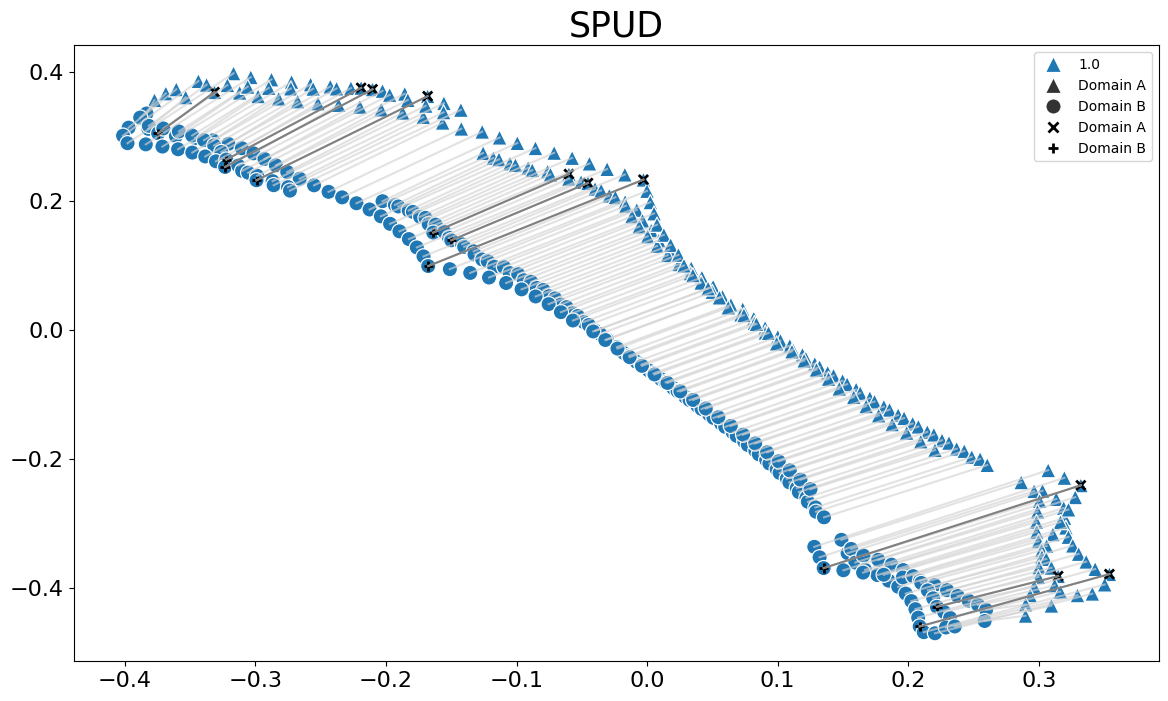

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.00015


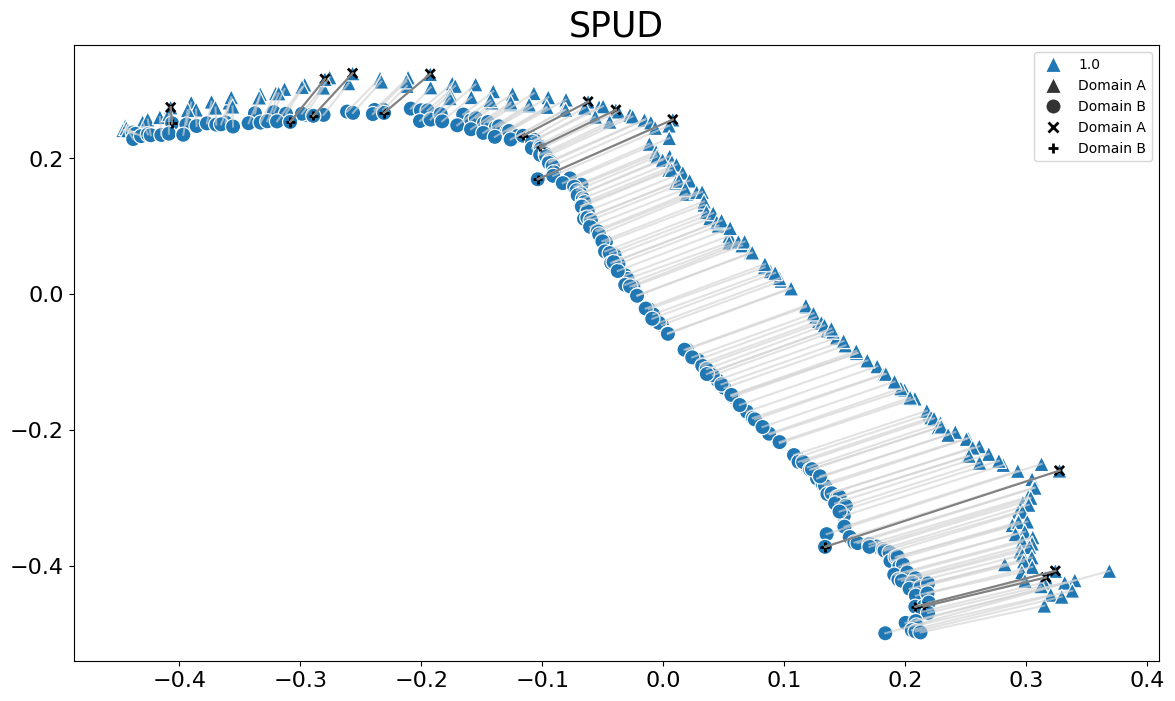

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mashspud\MASH.py:331: RuntimeWarning: invalid value encountered in divide
  return matrix / row_sums[:, np.newaxis]
C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.06355000000000001
RF score trained on full Embedding: None


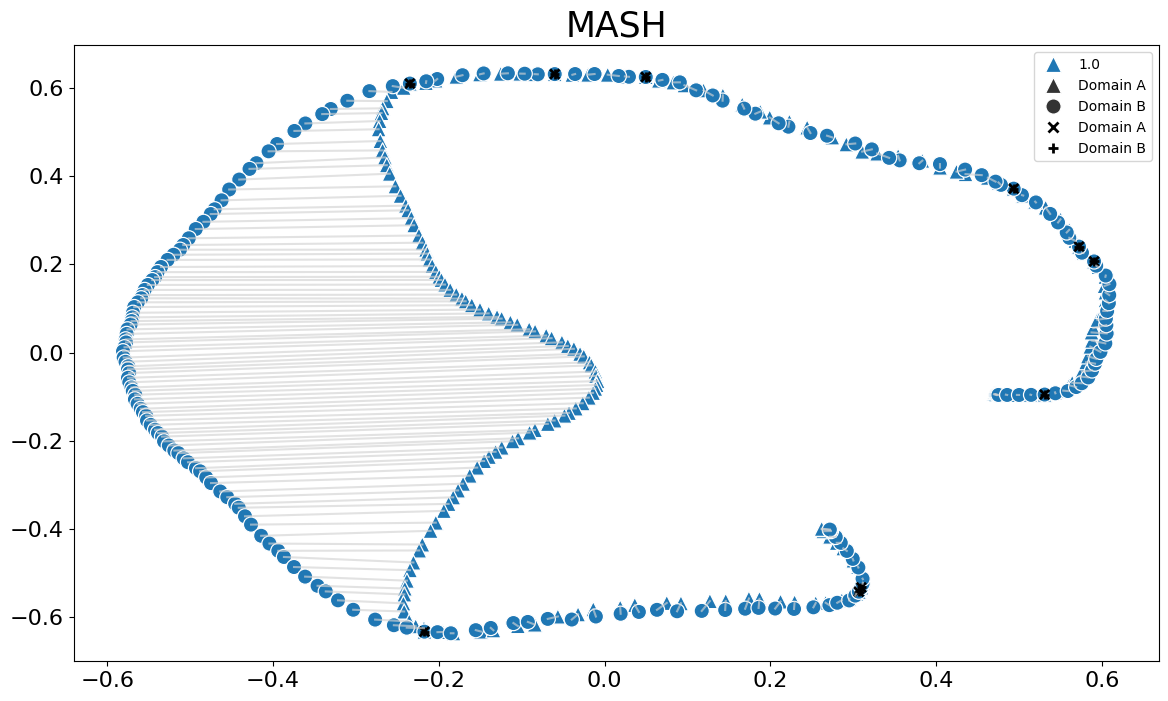

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.059750000000000004
RF score trained on full Embedding: None


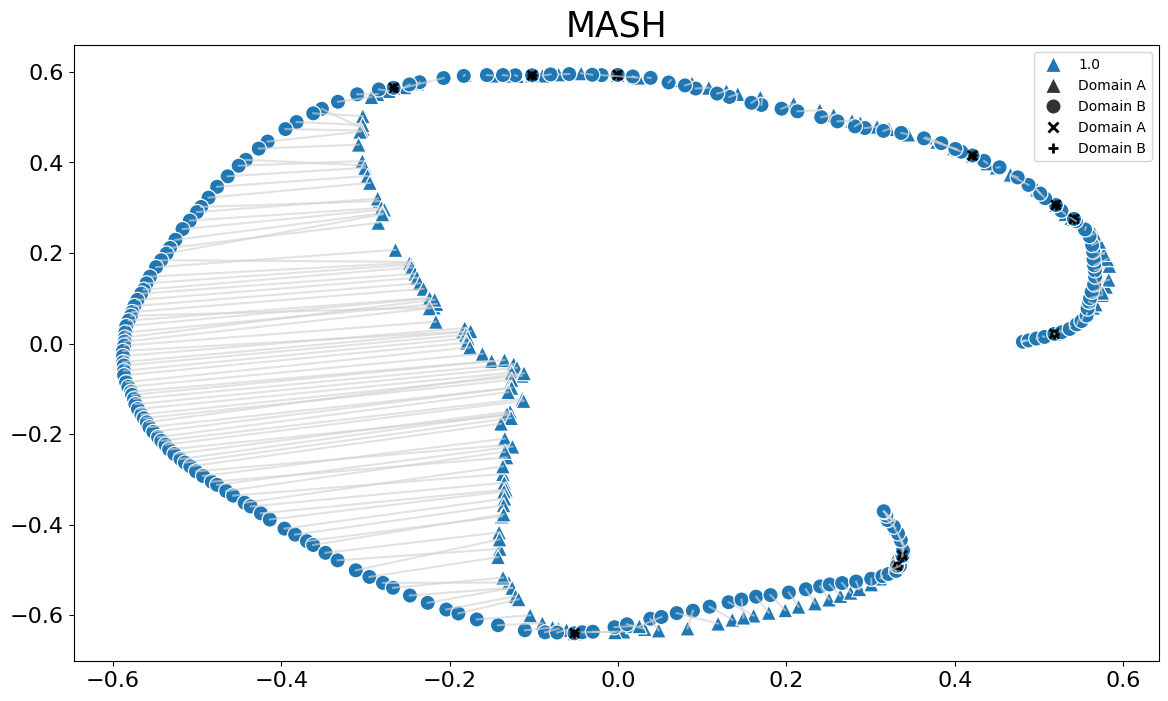

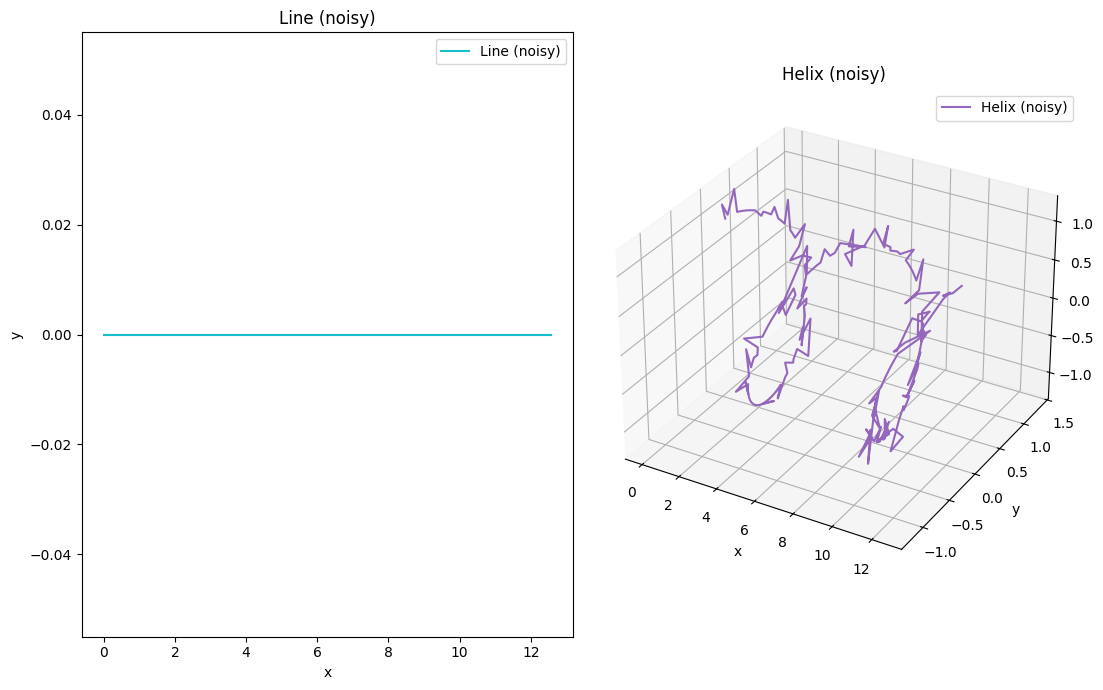

In [648]:
line, helix = generate_line_and_helix(200)
line_noisy, helix_noisy,noise_points = generate_line_and_helix_with_noise(200, noise_percentage=0.39, noise_scale=0.20)

training=helix
training_line=line
testing=helix_noisy
testing_line=line_noisy
anchors = create_anchors(len(helix))[:10]

spud_helix = SPUD()
spud_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
spud_helix.plot_emb(labels=None)
spud_noisy = SPUD()
spud_noisy.fit(testing.to_numpy(), testing_line.to_numpy(), anchors)
spud_noisy.plot_emb(labels=None)
mash_helix = MASH()
mash_helix.fit(training.to_numpy(), training_line.to_numpy(), anchors)
mash_helix.plot_emb(labels=None)
mash_noisy = MASH()
mash_noisy.fit(testing.to_numpy(), testing_line.to_numpy(), anchors)
mash_noisy.plot_emb(labels=None)
# print(type(mash_helix))

fig = plt.figure(figsize=(11, 7))
ax1 = fig.add_subplot(121)
ax1.plot(line_noisy['x'], line_noisy['y'], label='Line (noisy)', color='tab:cyan')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Line (noisy)')
ax1.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(helix_noisy['x'], helix_noisy['y'], helix_noisy['z'], label='Helix (noisy)', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (noisy)')
ax2.legend()
plt.tight_layout()
plt.show()

In [649]:
# Fitting the auto encoders.
AutoEncA = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
AutoEncA.fit(training.to_numpy(), spud_helix.emb[:len(training)], anchors)
AutoEncB = GRAEAnchor(lam=100, anchor_lam=100, relax=True, n_components = 2)
AutoEncB.fit(training_line.to_numpy(), spud_helix.emb[len(training_line):], anchors)
AutoEncA_m = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncA_m.fit(training.to_numpy(), mash_helix.emb[len(training):], anchors)
AutoEncB_m = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEncB_m.fit(training_line.to_numpy(), mash_helix.emb[len(training):], anchors)
AutoEnc_snh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
# Noisy stuff starts here.
AutoEnc_snh.fit(testing.to_numpy(), spud_noisy.emb[:len(testing)], anchors)
AutoEnc_snl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_snl.fit(testing_line.to_numpy(), spud_noisy.emb[len(testing):], anchors)
AutoEnc_mnh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_mnh.fit(testing.to_numpy(), mash_noisy.emb[:len(testing)], anchors)
AutoEnc_mnl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_mnl.fit(testing_line.to_numpy(), mash_noisy.emb[:len(testing_line)], anchors)

In [650]:
# Transformations and inverse transformations for noisy helix with SPUD and MASH values.
spud_helix_encoded=AutoEnc_snh.transform(helix_noisy.values)
mash_helix_encoded=AutoEnc_mnh.transform(helix_noisy.values)

inverter_spud=AutoEnc_snh.inverse_transform(spud_helix_encoded)
inverter_mash=AutoEnc_mnh.inverse_transform(mash_helix_encoded)

mash_line_encoded=AutoEnc_mnl.transform(line_noisy.values)
inverter_line=AutoEnc_mnl.inverse_transform(mash_line_encoded)

spud_line_encoder=AutoEnc_snl.transform(line_noisy.values)
spud_line_inverter=AutoEnc_snl.inverse_transform(spud_line_encoder)

In [651]:
# This seperates the x, y, and z values for the helix.  It also takes the values out for the mash and spud inverters.  More details bellow

# These two lists hold the difference between the original(noisy helix) and the reconstructed helix(either mash or spud), both as abs 
difference_mash=[]
difference_spud=[]

#Okay these next few are interesting and may not make the most sense.  Here's the break down.

orgin=[] #This is the noizy helix
changes=[] #This is only used in the mash version, but what it's doing is taking the inverter mash value the for loop is currently at and adding it here.
clean=[] # This is the clean helix with no noise to it and is just a compiled list.
noise_x=[] # X values for the noisy helix
noise_y=[] # Y values for the noisy helix
noise_z=[] # Z values for the noisy helix

#Mash values
mash_inverter_x=[] # X Values for the mash inverter
mash_inverter_x_diff=[]
mash_inverter_y=[] # Y Values for the mash inverter
mash_inverter_y_diff=[]
mash_inverter_z=[] # Z Values for the mash inverter
mash_inverter_z_diff=[]

#Spud values
spud_inverter_x=[] # X Values for the spud inverter
spud_inverter_x_diff=[]
spud_inverter_y=[] # Y Values for the spud inverter
spud_inverter_y_diff=[]
spud_inverter_z=[] # Z Values for the spud inverter
spud_inverter_z_diff=[]

#Sanity check, let's make sure the shape is consistant.

for x in range(len(helix_noisy)):
    for y in range(inverter_mash.shape[1]):
        original=helix_noisy.iloc[x, y]
        orgin.append(original)
        
        reconstructed=inverter_mash[x][y]        
        changes.append(reconstructed)

        pristine=helix.iloc[x,y]
        clean.append(pristine)

        dif=abs(original)-abs(reconstructed)
        difference_mash.append(dif)
        # Putting the values of the inverter in the corresponding spots x, y, and z
        if y == 0:
            noise_x.append(original)
            mash_inverter_x.append(reconstructed)
            mash_inverter_x_diff.append(dif)
        elif y == 1:
            noise_y.append(original)
            mash_inverter_y.append(reconstructed)
            mash_inverter_y_diff.append(dif)
        elif y == 2:
            noise_z.append(original)
            mash_inverter_z.append(reconstructed)
            mash_inverter_z_diff.append(dif)

for x in range(len(helix_noisy)):
    for y in range(inverter_spud.shape[1]):
        original=helix_noisy.iloc[x,y]
        reconstructed=inverter_spud[x][y]
        dif=abs(original)-abs(reconstructed)

        difference_spud.append(dif)
        if y == 0:
            spud_inverter_x.append(reconstructed)
            spud_inverter_x_diff.append(dif)
        elif y == 1:
            spud_inverter_y.append(reconstructed)
            spud_inverter_y_diff.append(dif)
        elif y == 2:
            spud_inverter_z.append(reconstructed)
            spud_inverter_z_diff.append(dif)

In [652]:
abs_x_mash=[]
abs_y_mash=[]
abs_z_mash=[]
abs_x_spud=[]
abs_y_spud=[]
abs_z_spud=[]

for x in range(len(mash_inverter_x)):
    m_inverter=mash_inverter_x[x]
    s_inverter=spud_inverter_x[x]
    n_x=noise_x[x]
    dif_m=abs(n_x-m_inverter)
    dif_s=abs(n_x-s_inverter)
    abs_x_mash.append(dif_m)
    abs_x_spud.append(dif_s)

for x in range(len(mash_inverter_x)):
    m_inverter=mash_inverter_y[x]
    s_inverter=spud_inverter_y[x]
    n_x=noise_y[x]
    dif_m=abs(n_x-m_inverter)
    dif_s=abs(n_x-s_inverter)
    abs_y_mash.append(dif_m)
    abs_y_spud.append(dif_s)

for x in range(len(mash_inverter_x)):
    m_inverter=mash_inverter_z[x]
    s_inverter=spud_inverter_z[x]
    n_x=noise_z[x]
    dif_m=abs(n_x-m_inverter)
    dif_s=abs(n_x-s_inverter)
    abs_z_mash.append(dif_m)
    abs_z_spud.append(dif_s)


### Alternate method
I'm going to try this with the total difference mash and spud values.

In [653]:
mash_total_90=np.quantile(difference_mash, 0.9, axis=0)
spud_total_90=np.quantile(difference_spud, 0.9, axis=0)

In [654]:
mash_90_rev=[]
spud_90_rev=[]
for x in range(len(difference_mash)):
    if difference_mash[x]>=mash_total_90:
        mash_90_rev.append(round(x/3)-1)
    if difference_spud[x]>=spud_total_90:
        spud_90_rev.append(round(x/3)-1)
print(len(mash_90_rev), len(spud_90_rev))
mash_90_rev_set=set(mash_90_rev)
spud_90_rev_set=set(spud_90_rev)
print(len(spud_90_rev_set), len(mash_90_rev_set))
print(len(difference_mash))

60 60
60 55
600


For sake of sanity here, we will be removing based on quantiles, not values over one.

In [655]:
#Try reseting abs to see if that changes anything
mash_x_abs=[]
mash_y_abs=[]
mash_z_abs=[]
spud_x_abs=[]
spud_y_abs=[]
spud_z_abs=[]

for x in range(len(mash_inverter_x_diff)):
    mash_x_abs.append(abs(mash_inverter_x_diff[x]))
    mash_y_abs.append(abs(mash_inverter_y_diff[x]))
    mash_z_abs.append(abs(mash_inverter_z_diff[x]))
    spud_x_abs.append(abs(spud_inverter_x_diff[x]))
    spud_y_abs.append(abs(spud_inverter_y_diff[x]))
    spud_z_abs.append(abs(spud_inverter_z_diff[x]))

In [656]:
# Set up the 90%
mash_x_dif=np.array(abs_x_mash)
mash_y_dif=np.array(abs_y_mash)
mash_z_dif=np.array(abs_z_mash)
spud_x_dif=np.array(abs_x_spud)
spud_y_dif=np.array(abs_y_spud)
spud_z_dif=np.array(abs_z_spud)

mash_x_90=np.quantile(mash_x_dif, 0.93, axis=0)
mash_y_90=np.quantile(mash_y_dif, 0.93, axis=0)
mash_z_90=np.quantile(mash_z_dif, 0.93, axis=0)
spud_x_90=np.quantile(spud_x_dif, 0.95, axis=0)
spud_y_90=np.quantile(spud_y_dif, 0.95, axis=0)
spud_z_90=np.quantile(spud_z_dif, 0.95, axis=0)

In [657]:
mash_90=[]
spud_90=[]

for x in range(len(mash_x_dif)):
    if mash_x_dif[x]>=mash_x_90:
        mash_90.append(x)
    if mash_y_dif[x]>=mash_y_90:
        mash_90.append(x)
    if mash_z_dif[x]>=mash_z_90:
        mash_90.append(x)
    if spud_x_dif[x]>=spud_x_90:
        spud_90.append(x)
    if spud_y_dif[x]>=spud_y_90:
        spud_90.append(x)
    if spud_z_dif[x]>=spud_z_90:
        spud_90.append(x)

spud_90_set=set(spud_90)
mash_90_set=set(mash_90)
print(len(mash_90_set), len(spud_90_set))

37 30


In [658]:
mash_90=[]
spud_90=[]

for x in range(len(mash_x_dif)):
    if mash_x_dif[x]>=mash_x_90:
        mash_90.append(x)
    elif mash_y_dif[x]>=mash_y_90:
        mash_90.append(x)
    elif mash_z_dif[x]>=mash_z_90:
        mash_90.append(x)
    if spud_x_dif[x]>=spud_x_90:
        spud_90.append(x)
    elif spud_y_dif[x]>=spud_y_90:
        spud_90.append(x)
    elif spud_z_dif[x]>=spud_z_90:
        spud_90.append(x)

spud_90_set=set(spud_90)
mash_90_set=set(mash_90)
print(len(mash_90_set), len(spud_90_set))

37 30


In [659]:
# Anchor set up.
mutable_anchors=[]
for x in range(len(anchors)):
    mutable_anchors.append(anchors[x,0])

mash_overlap = set(mutable_anchors) & set(mash_90_set)
spud_overlap = set(mutable_anchors) & set(spud_90_set)


if len(mash_overlap) >= 1:
    print("Anchors in mash", mash_overlap)
    for point in mash_overlap:
        mash_90_set.remove(point)
if len(spud_overlap) >= 1:
    print("Anchors in spud", spud_overlap)
    for point in spud_overlap:
        spud_90_set.remove(point)


Anchors in mash {np.int64(163), np.int64(189), np.int64(6)}
Anchors in spud {np.int64(163)}


In [660]:
noisy_array=helix_noisy.to_numpy()
noisy_line=line_noisy.to_numpy()
mash_start_helix=list(noisy_array)
mash_start_line=list(noisy_line)
spud_start_helix=list(noisy_array)
spud_start_line=list(noisy_line)

mash_90=mash_90_set
spud_90=spud_90_set
sorted_mash=sorted(mash_90)
sorted_spud=sorted(spud_90)


mash_moded_anchor=mod_anchors(mutable_anchors, sorted_mash)
spud_moded_anchor=mod_anchors(mutable_anchors, sorted_spud)
removed_mash=[]
removed_spud=[]

for x in range(len(sorted_mash)):
    point=sorted_mash.pop()
    del mash_start_helix[point]
    del mash_start_line[point]
    removed_mash.append(point)
for x in range(len(sorted_spud)):
    point=sorted_spud.pop()
    del spud_start_helix[point]
    del spud_start_line[point]
    removed_spud.append(point)


166 165
34


C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.06822470605312815
RF score trained on full Embedding: None


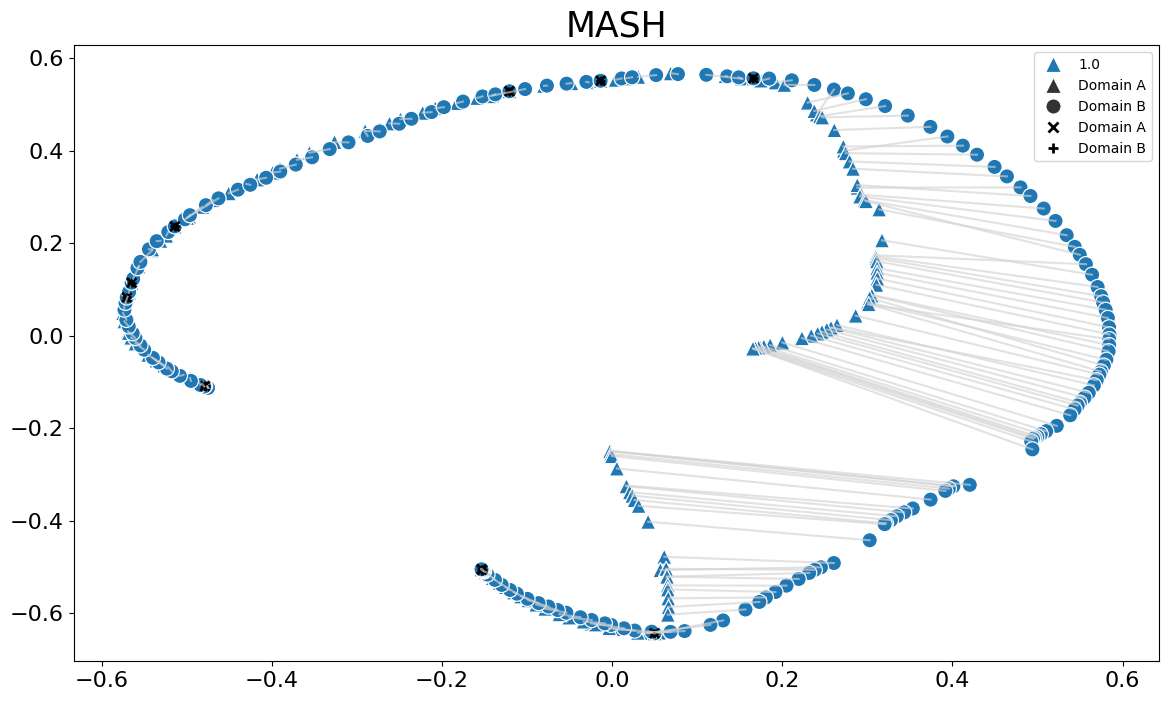

In [661]:
mash_anchors=np.stack((mash_moded_anchor, mash_moded_anchor), axis=1)
print(len(mash_start_helix), np.max(mash_anchors))
print(len(mash_90))

mash_rebuild=MASH()
mash_rebuild.fit(np.array(mash_start_helix), np.array(mash_start_line), mash_anchors)
mash_rebuild.plot_emb(labels=None)

171 164
29


C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.00013679422728360863


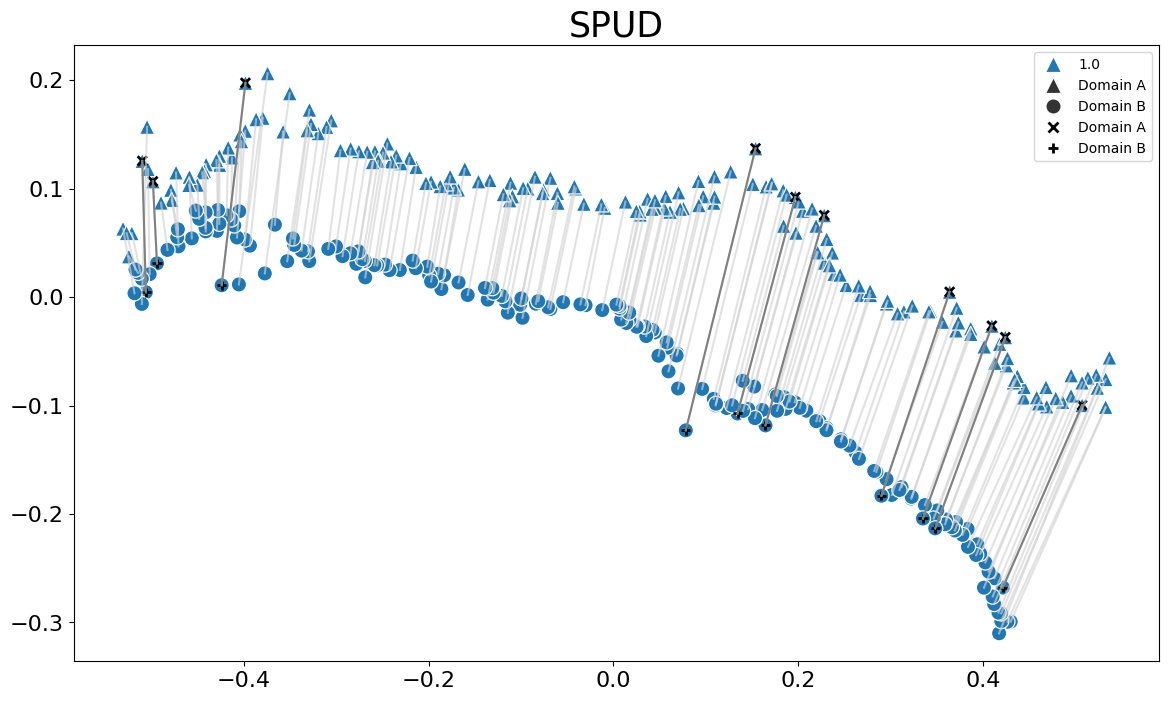

In [662]:
spud_anchors=np.stack((spud_moded_anchor, spud_moded_anchor), axis=1)
print(len(spud_start_helix), np.max(spud_anchors))
print(len(spud_90))

spud_rebuild=SPUD()
spud_rebuild.fit(np.array(spud_start_helix), np.array(spud_start_line), spud_anchors)
spud_rebuild.plot_emb(labels=None)

## Adding back
At this point we've removed around 10% of the points, something is going on where it isn't pulling up to 10%, I'm having to cap it around 93 percent.  Now we need to figure out how to reinsert the values.  BAsically undo what we just did.

In [663]:
#References:  testing is the helix, testing_line is the line.  The embededs are the mash and spud objects so we should just need to switch those around.

AutoEnc_s_lnh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_s_lnh.fit(np.array(spud_start_helix), spud_rebuild.emb[:len(spud_start_helix)], spud_anchors)
AutoEnc_s_lnl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_s_lnl.fit(np.array(spud_start_line), spud_rebuild.emb[len(spud_start_line):], spud_anchors)
AutoEnc_m_lnh = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_m_lnh.fit(np.array(mash_start_helix), mash_rebuild.emb[:len(mash_start_helix)], mash_anchors)
AutoEnc_m_lnl = GRAEAnchor(lam=100, anchor_lam=100, relax=False, n_components = 2)
AutoEnc_m_lnl.fit(np.array(mash_start_line), mash_rebuild.emb[:len(mash_start_line)], mash_anchors)

In [664]:
spud_helix_re_encoded=AutoEnc_snh.transform(np.array(spud_start_helix))
mash_helix_re_encoded=AutoEnc_mnh.transform(np.array(mash_start_helix))

re_inverter_spud=AutoEnc_s_lnh.inverse_transform(spud_helix_re_encoded)
re_inverter_mash=AutoEnc_m_lnh.inverse_transform(mash_helix_re_encoded)

mash_line_encoded=AutoEnc_m_lnl.transform(np.array(mash_start_line))
spud_line_encoder=AutoEnc_s_lnl.transform(np.array(spud_start_line))

In [665]:
new_mash_x=[]
new_mash_y=[]
new_mash_z=[]

new_spud_x=[]
new_spud_y=[]
new_spud_z=[]

for x in range(len(re_inverter_mash)):
    new_mash_x.append(re_inverter_mash[x,0])
    new_mash_y.append(re_inverter_mash[x,1])
    new_mash_z.append(re_inverter_mash[x,2])

for x in range(len(re_inverter_spud)):
    new_spud_x.append(re_inverter_spud[x,0])
    new_spud_y.append(re_inverter_spud[x,1])
    new_spud_z.append(re_inverter_spud[x,2])

print(len(new_mash_x), len(new_spud_x))

166 171


In block bellow, pass points through the autoencoder.  Use AE object .transform and pass in points removed.  Run inverese tranform (cell 7).
Build a reconstruction with noise points and color them to know the differences.
mash_rebuild, and spud_rebuild is what we're going to want to use.

In [666]:
#In order to reload the values we need to go front to back for values.
mash_reinsert=list(mash_90)
mash_helix_rebuild=list(mash_start_helix)
print(len(mash_helix_rebuild))
mash_recon_list_helix=[]


for x in range(len(mash_90)):
    pull_in=mash_reinsert.pop(0)
    x_reinsert=helix_noisy.iloc[pull_in, 0]
    y_reinsert=helix_noisy.iloc[pull_in, 1]
    z_reinsert=helix_noisy.iloc[pull_in, 2]
    replace=[x_reinsert, y_reinsert, z_reinsert]
    mash_recon_list_helix.append(replace)
    mash_helix_rebuild.insert(pull_in, replace)
print(len(mash_helix_rebuild))

166
200


In [667]:
spud_reinsert=list(spud_90)
spud_helix_rebuild=list(spud_start_helix)
print(len(spud_helix_rebuild))
spud_recon_list_helix=[]


for x in range(len(spud_90)):
    pull_in=spud_reinsert.pop(0)
    x_reinsert=helix_noisy.iloc[pull_in, 0]
    y_reinsert=helix_noisy.iloc[pull_in, 1]
    z_reinsert=helix_noisy.iloc[pull_in, 2]
    replace=[x_reinsert, y_reinsert, z_reinsert]
    spud_recon_list_helix.append(replace)
    spud_helix_rebuild.insert(pull_in, replace)
print(len(spud_helix_rebuild))

171
200


In [668]:
spud_reinsert=list(spud_90)
spud_line_rebuild=list(spud_start_line)
spud_recon_list_line=[]

for x in range(len(spud_90)):
    pull_in=spud_reinsert.pop(0)
    x_reinsert=helix_noisy.iloc[pull_in, 0]
    y_reinsert=helix_noisy.iloc[pull_in, 1]
    replace=[x_reinsert, y_reinsert]
    spud_recon_list_line.append(replace)
    spud_line_rebuild.insert(pull_in, replace)
print(len(spud_line_rebuild))

200


In [669]:
mash_reinsert=list(mash_90)
mash_line_rebuild=list(mash_start_line)
print(len(mash_90))
mash_recon_list_line=[]

for x in range(len(mash_90)):
    # print(x)
    pull_in=mash_reinsert.pop(0)
    x_reinsert=line_noisy.iloc[pull_in, 0]
    y_reinsert=line_noisy.iloc[pull_in, 1]
    replace=[x_reinsert, y_reinsert]
    mash_recon_list_line.append(replace)
    mash_line_rebuild.insert(pull_in, replace)
print(len(mash_line_rebuild))

34
200


In [670]:
spud_helix_df=pd.DataFrame(spud_recon_list_helix)
spud_line_df=pd.DataFrame(spud_recon_list_line)
mash_helix_df=pd.DataFrame(mash_recon_list_helix)
mash_line_df=pd.DataFrame(mash_recon_list_line)

In [671]:
spud_recon_line=AutoEnc_s_lnl.transform(spud_line_df.values)
spud_recon_helix=AutoEnc_s_lnh.transform(spud_helix_df.values)
mash_recon_line=AutoEnc_m_lnl.transform(mash_line_df.values)
mash_recon_helix=AutoEnc_m_lnh.transform(mash_helix_df.values)
print(len(mash_recon_helix))
print(len(mash_recon_line))
print(len(mash_90))

34
34
34


C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.064225
RF score trained on full Embedding: None


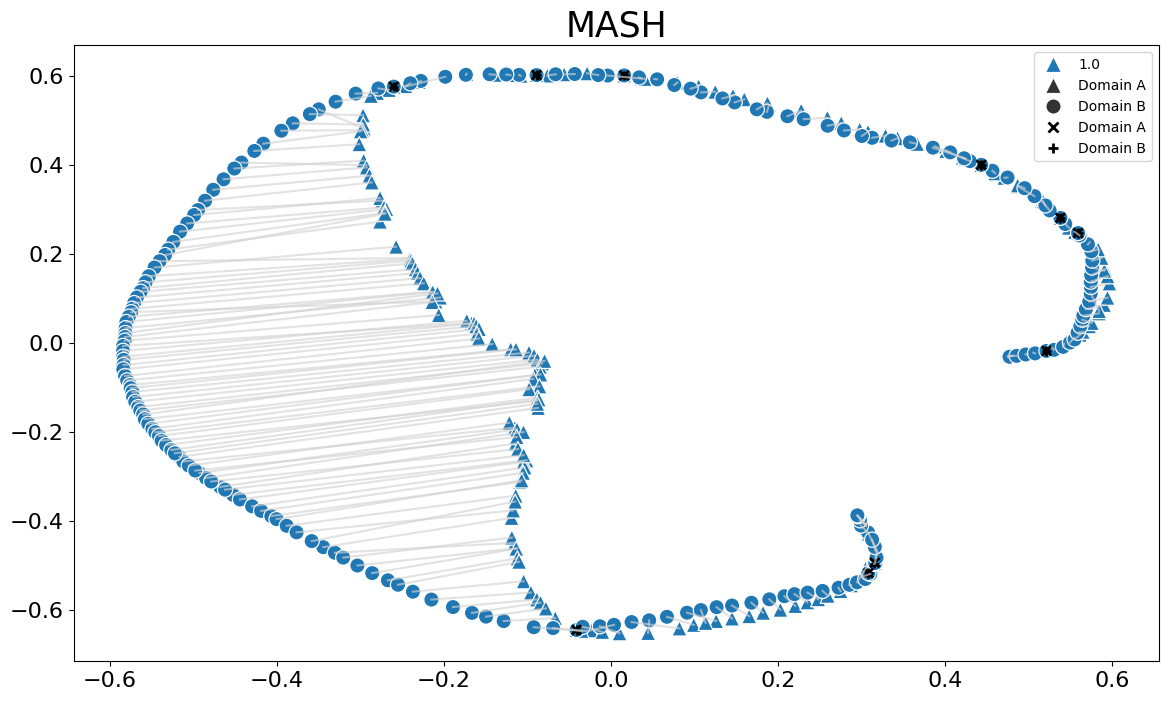

Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.06355000000000001
RF score trained on full Embedding: None


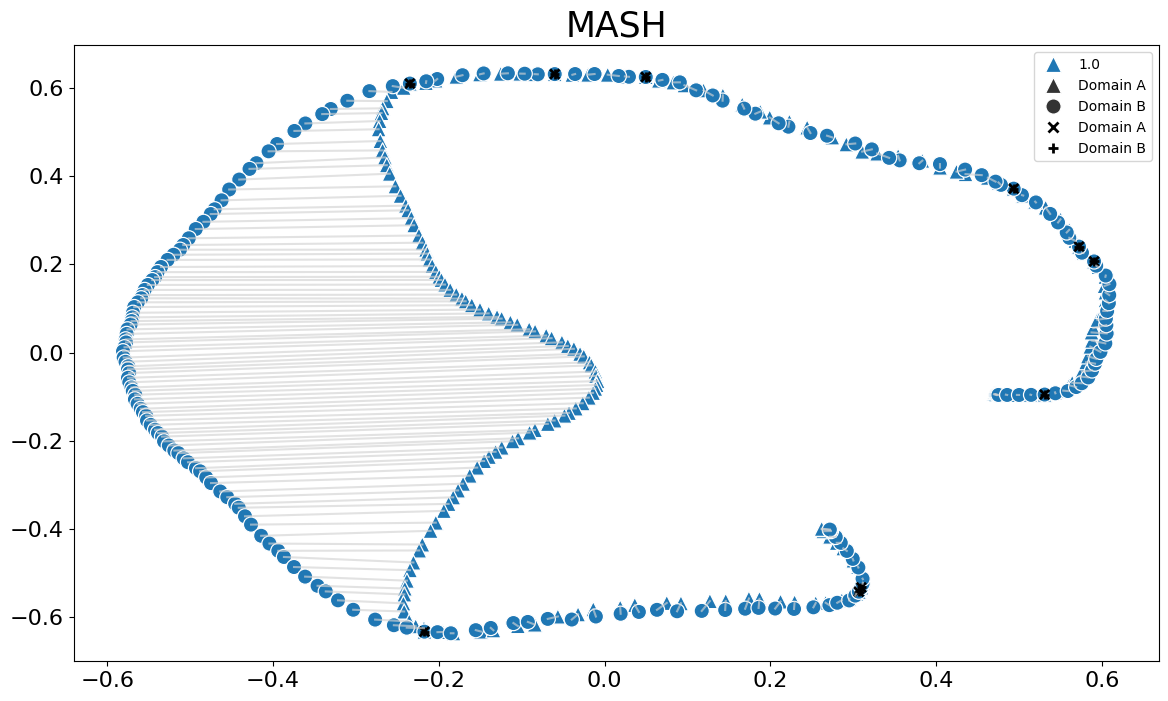

In [672]:
mash_add_back=MASH()
mash_add_back.fit(np.array(mash_helix_rebuild), np.array(mash_line_rebuild), anchors)
mash_add_back.plot_emb(labels=None)
mash_helix.plot_emb(labels=None)

C:\Users\03bud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0002


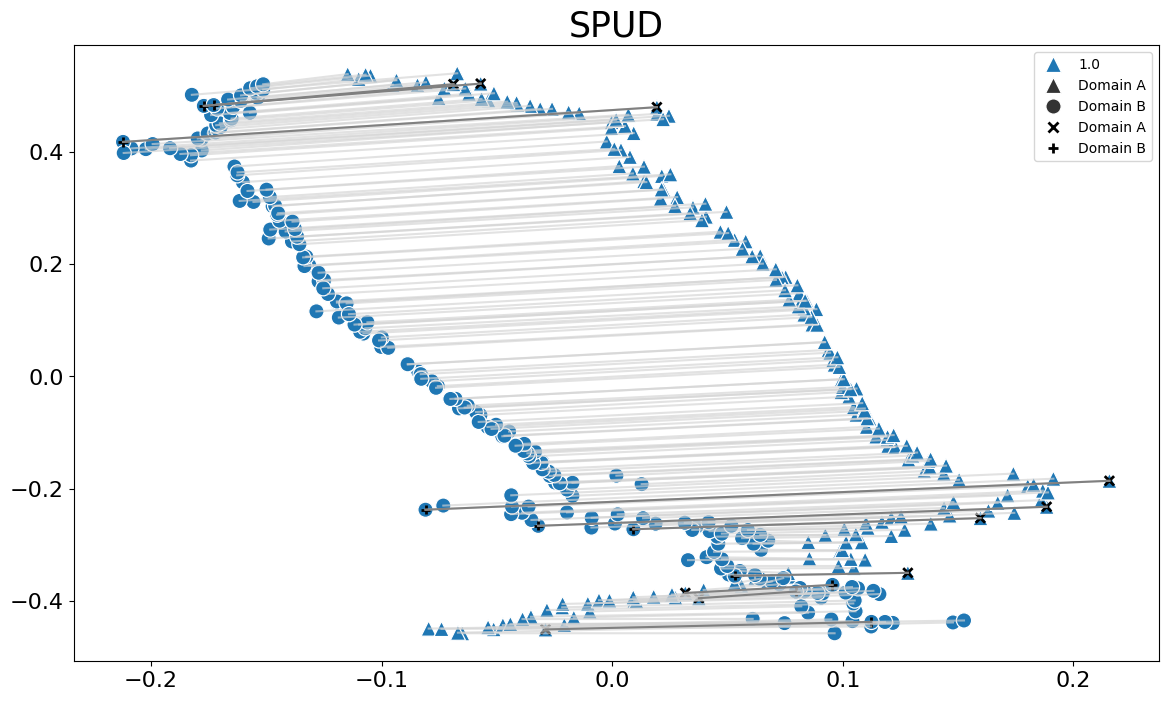

RF score on full embedding: None
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0


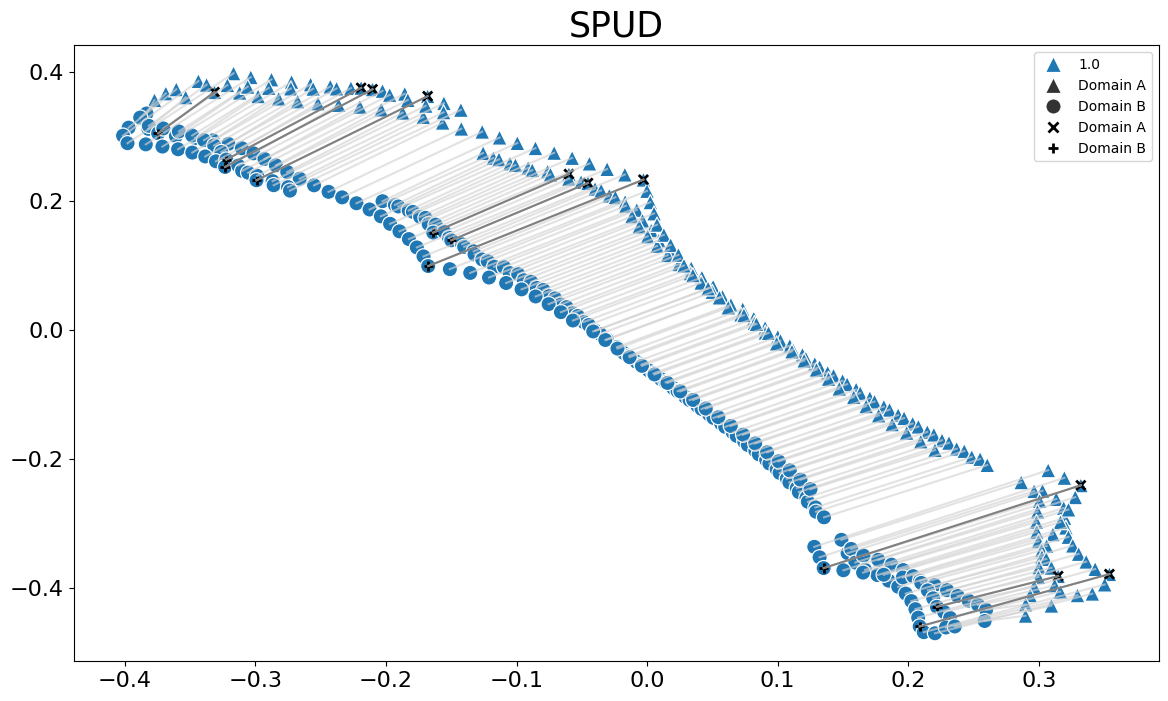

In [673]:
spud_add_back=SPUD()
spud_add_back.fit(np.array(spud_helix_rebuild), np.array(spud_line_rebuild), anchors)
spud_add_back.plot_emb(labels=None)
spud_helix.plot_emb(labels=None)

### Graphing the helix.

In [674]:
# mash_90=list(mash_90)
print(np.shape(mash_start_helix))
print(np.shape(mash_helix_df))
print(len(mash_90))
# AutoEnc_m_lnh.plot(np.array(mash_start_helix))
# AutoEnc_s_lnh.plot_loss()

(166, 3)
(34, 3)
34


In [675]:
spud_line_df=pd.DataFrame(spud_line_rebuild)
spud_helix_df=pd.DataFrame(spud_helix_rebuild)
mash_line_df=pd.DataFrame(mash_line_rebuild)
mash_helix_df=pd.DataFrame(mash_helix_rebuild)

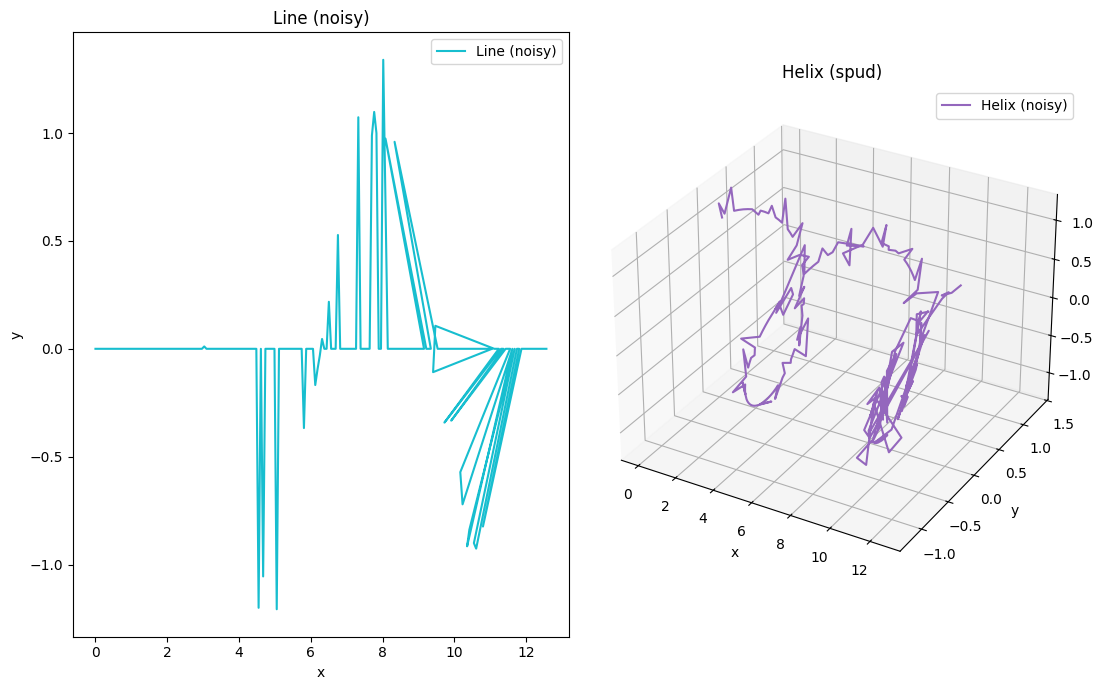

In [676]:
fig = plt.figure(figsize=(11, 7))
ax1 = fig.add_subplot(121)
ax1.plot(spud_line_df[0], spud_line_df[1], label='Line (noisy)', color='tab:cyan')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Line (noisy)')
ax1.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(spud_helix_df[0], spud_helix_df[1], spud_helix_df[2], label='Helix (noisy)', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (spud)')
ax2.legend()
plt.tight_layout()  
plt.show()

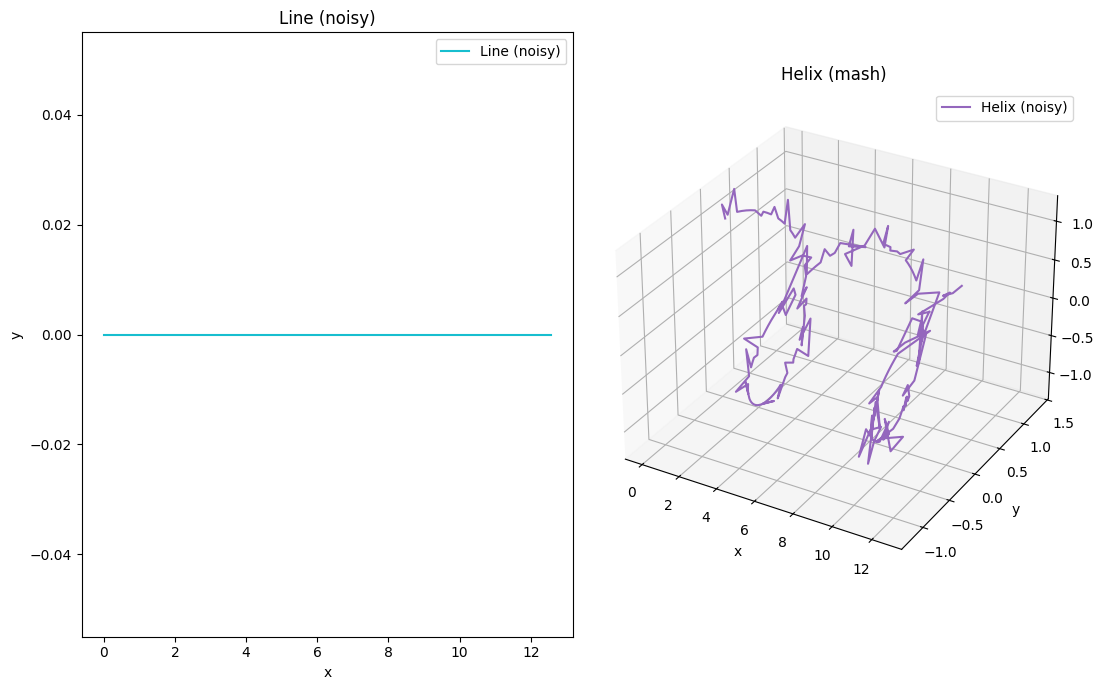

In [677]:
fig = plt.figure(figsize=(11, 7))
ax1 = fig.add_subplot(121)
ax1.plot(mash_line_df[0], mash_line_df[1], label='Line (noisy)', color='tab:cyan')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Line (noisy)')
ax1.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(mash_helix_df[0], mash_helix_df[1], mash_helix_df[2], label='Helix (noisy)', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (mash)')
ax2.legend()
plt.tight_layout()  
plt.show()

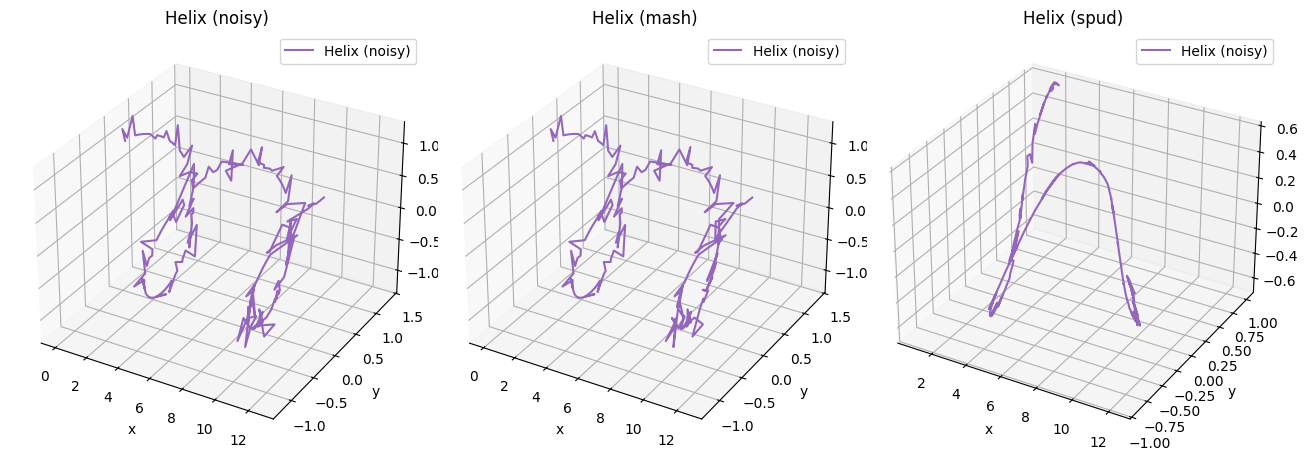

In [678]:
fig = plt.figure(figsize=(13, 7))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(mash_helix_df[0], mash_helix_df[1], mash_helix_df[2], label='Helix (noisy)', color='tab:purple')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Helix (noisy)')
ax1.legend()
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(helix_noisy['x'], helix_noisy['y'], helix_noisy['z'], label='Helix (noisy)', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (mash)')
ax2.legend()
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(mash_inverter_x, mash_inverter_y, mash_inverter_z, label='Helix (noisy)', color='tab:purple')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('Helix (spud)')
ax3.legend()
plt.tight_layout()
plt.show()

In [679]:
print(mash_helix_df.shape)
print(helix_noisy.shape)

(200, 3)
(200, 3)


In [680]:
global overlap
global different
overlap=0
different=0
for x in range(len(mash_helix_df)):
    recon=mash_helix_df.iloc[x,0]
    noise=helix_noisy.iloc[x,0]
    if noise==recon:
        overlap+=1
    else:
        different+=1
print("There are ", overlap, "values that overlap")
print("There are ", different, "values that don't overlap")

There are  157 values that overlap
There are  43 values that don't overlap


In [681]:
global overlap
global different
overlap=0
different=0
for x in range(len(mash_helix_df)):
    recon_x=spud_helix_df.iloc[x,0]
    noise_x=helix_noisy.iloc[x,0]
    recon_y=spud_helix_df.iloc[x,1]
    noise_y=helix_noisy.iloc[x,1]
    recon_z=spud_helix_df.iloc[x,2]
    noise_z=helix_noisy.iloc[x,2]
    if noise_x==recon_x and noise_y==recon_y and noise_z==recon_z:
        overlap+=1
    else:
        different+=1
print("There are ", overlap, "values that overlap")
print("There are ", different, "values that don't overlap")

There are  140 values that overlap
There are  60 values that don't overlap


In [682]:
mash_frame=pd.DataFrame(inverter_mash)
spud_frame=pd.DataFrame(inverter_spud)

In [683]:
global overlap
global different
overlap=0
different=0
for x in range(len(mash_helix_df)):
    recon=mash_frame.iloc[x,0]
    noise=helix_noisy.iloc[x,0]
    if noise==recon:
        overlap+=1
    else:
        different+=1
print("There are ", overlap, "values that overlap")
print("There are ", different, "values that don't overlap")

There are  0 values that overlap
There are  200 values that don't overlap


In [684]:
global overlap
global different
overlap=0
different=0
for x in range(len(mash_helix_df)):
    recon=spud_frame.iloc[x,0]
    noise=helix_noisy.iloc[x,0]
    if noise==recon:
        overlap+=1
    else:
        different+=1
print("There are ", overlap, "values that overlap")
print("There are ", different, "values that don't overlap")

There are  0 values that overlap
There are  200 values that don't overlap


In [685]:
print(helix_noisy.iloc[0,1])
print(mash_frame.iloc[0,1])

0.12177750376830923
0.9926948
